In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [3]:
df = pd.read_csv(r"E:\Data Set\Travil_Clean_Dataset.csv")

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.drop(['Unnamed: 0','flight'] , axis = 1 ,inplace = True)

In [6]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [7]:
df = df.join(pd.get_dummies(df.stops, prefix='stops').astype(int)).drop('stops', axis=1)
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [8]:
X = df.drop('price' , axis = 1)
y = df['price']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= .25 , random_state=42)

In [10]:
X_train.shape , y_train.shape

((225114, 36), (225114,))

In [32]:
RFModel = RandomForestRegressor(n_jobs=-1)

In [33]:
RFModel.fit(X_train , y_train)

RandomForestRegressor(n_jobs=-1)

In [34]:
RFModel.score(X_train,y_train)

0.9975374614736386

In [36]:
y_pred = RFModel.predict(X_test)
print('R2 :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))

R2 : 0.9847636468824529
MAE : 1088.199233439136
MSE : 7856138.143734321


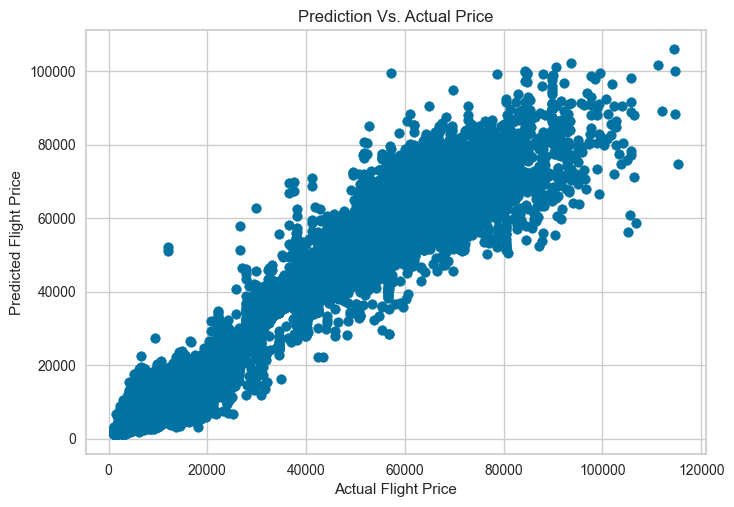

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs. Actual Price')
plt.show()

In [11]:
exp_name = setup(X_train, target = y_train)
# modeling
best_model = compare_models()
# analyze best model
evaluate_model(best_model)

,Description,Value
0,Session id,5992
1,Target,price
2,Target type,Regression
3,Original data shape,"(225114, 37)"
4,Transformed data shape,"(225114, 37)"
5,Transformed train set shape,"(157579, 37)"
6,Transformed test set shape,"(67535, 37)"
7,Numeric features,36
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1167.6522,7984029.4657,2824.9309,0.9845,0.1467,0.0793,7.9750
et,Extra Trees Regressor,1221.8225,9300478.8859,3049.0072,0.9819,0.1602,0.0834,8.4310
xgboost,Extreme Gradient Boosting,1971.7139,11848989.5475,3441.9253,0.9770,0.2015,0.1460,0.5440
dt,Decision Tree Regressor,1276.0590,13245471.5160,3638.4122,0.9743,0.1871,0.0851,0.3000
lightgbm,Light Gradient Boosting Machine,2314.4438,15392749.6952,3922.9691,0.9701,0.2299,0.1748,0.2900
gbr,Gradient Boosting Regressor,2944.8301,24460245.5305,4945.2740,0.9525,0.2604,0.2065,2.4100
ada,AdaBoost Regressor,4032.5169,37534884.9390,6122.6832,0.9271,0.4077,0.3924,2.7750
br,Bayesian Ridge,4580.9954,45697445.6750,6759.5479,0.9112,0.6191,0.4662,0.5220
llar,Lasso Least Angle Regression,4579.1230,45698563.9422,6759.6311,0.9112,0.6179,0.4656,0.1170
ridge,Ridge Regression,4580.9935,45697447.4994,6759.5480,0.9112,0.6191,0.4662,0.0710


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
pridect = predict_model(best_model , X_test)

In [16]:
pridect['prediction_label'][:5]

27131      7357.60
266857    71621.56
141228     6195.00
288329    60319.04
97334      6610.45
Name: prediction_label, dtype: float64

In [15]:
y_test[:5]

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
Name: price, dtype: int64

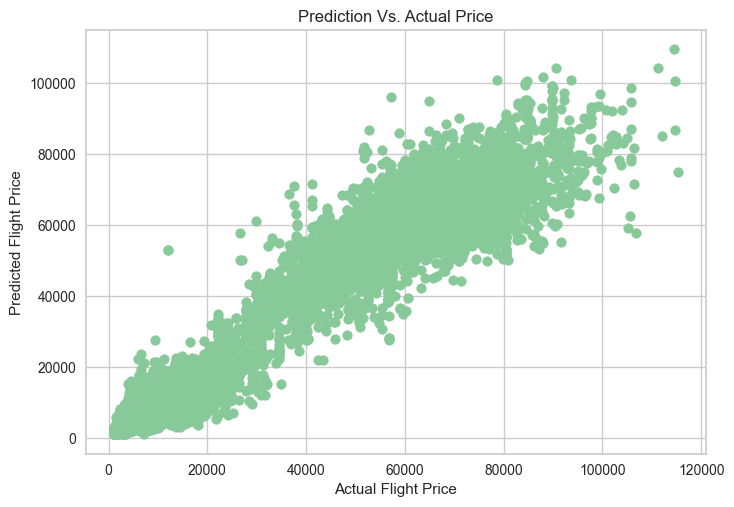

In [30]:
plt.scatter(y_test,pridect['prediction_label'] ,color = '#88c999')
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs. Actual Price')
plt.show()